In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

In [175]:
df = pd.read_csv("forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [177]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [178]:
numerical = [i for i in df.columns if df[i].dtype != "O"]
categorical = [i for i in df.columns if df[i].dtype == "O"]

In [179]:
numerical, categorical

(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'],
 ['month', 'day'])

In [180]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [181]:
for i in df.columns:
    print(df[i].value_counts())

4    91
6    86
2    73
8    61
7    60
3    55
1    48
5    30
9    13
Name: X, dtype: int64
4    203
5    125
6     74
3     64
2     44
9      6
8      1
Name: Y, dtype: int64
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
91.6    28
92.1    28
91.0    22
91.7    19
93.7    16
        ..
50.4     1
82.1     1
86.3     1
85.1     1
87.1     1
Name: FFMC, Length: 106, dtype: int64
99.0     10
129.5     9
142.4     8
231.1     8
137.0     7
         ..
4.6       1
24.9      1
133.6     1
96.3      1
3.2       1
Name: DMC, Length: 215, dtype: int64
745.3    10
692.6     9
698.6     8
601.4     8
692.3     8
         ..
730.6     1
431.6     1
74.3      1
313.4     1
537.4     1
Name: DC, Length: 219, dtype: int64
9.6     23
7.1     21
6.3     20
7.0     17
8.4     17
        ..
7.3    

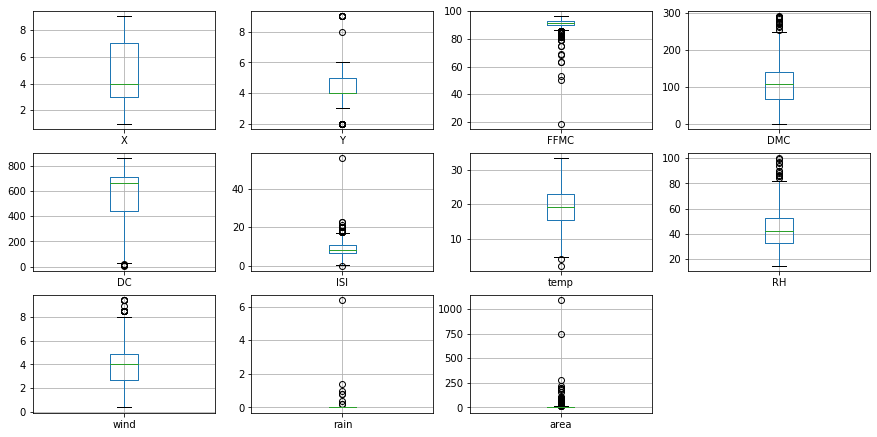

In [182]:
plt.figure(figsize = (15, 10))

for i in range(1, len(numerical)+1):
    plt.subplot(4,4,i)
    fig = df.boxplot(column = numerical[i-1])
    # fig.set_title("Pregnancies")

In [183]:
numerical1 = numerical
for i in range(1, len(numerical1)+1):
    
    iqr = df[numerical1[i-1]].quantile(0.75) - df[numerical1[i-1]].quantile(0.25)
    min_val = df[numerical1[i-1]].quantile(0.25) - (iqr * 1.5)
    max_val = df[numerical1[i-1]].quantile(0.75) + (iqr * 1.5)
    df[numerical1[i-1]] = np.where(df[numerical1[i-1]] > max_val, max_val, df[numerical1[i-1]])
    df[numerical1[i-1]] = np.where(df[numerical1[i-1]] < min_val, min_val, df[numerical1[i-1]])

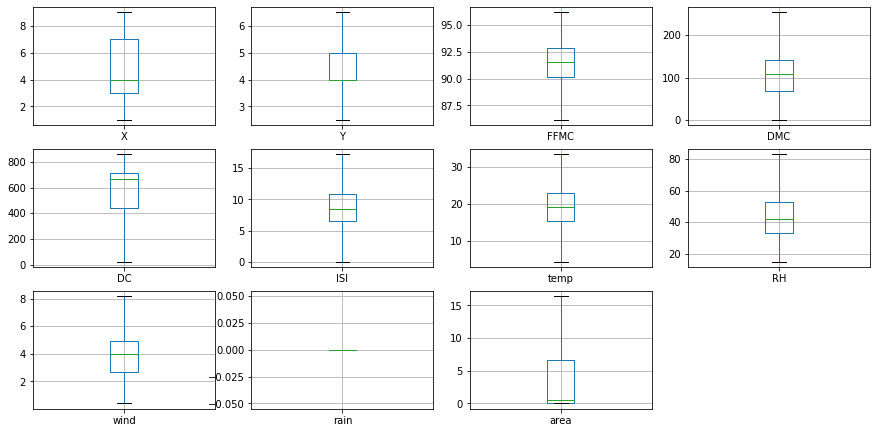

In [184]:
plt.figure(figsize = (15, 10))

for i in range(1, len(numerical)+1):
    plt.subplot(4,4,i)
    fig = df.boxplot(column = numerical[i-1])
    # fig.set_title("Pregnancies")

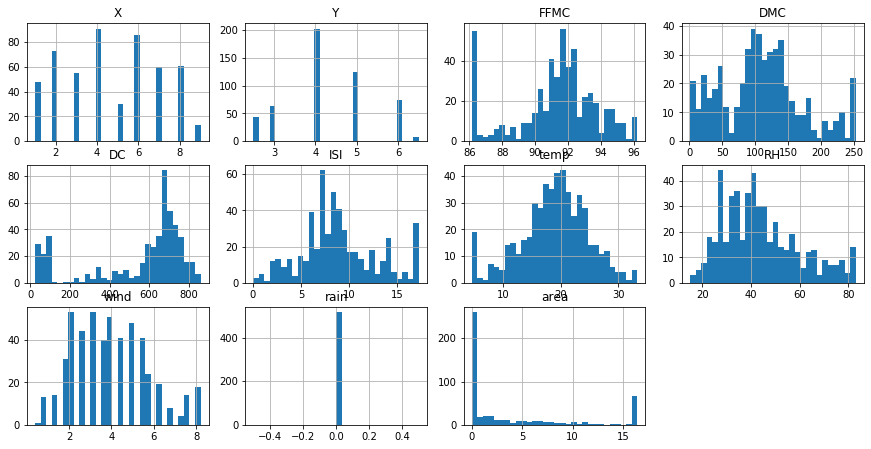

In [185]:
plt.figure(figsize = (15, 10))

for i in range(1, len(numerical)+1):
    plt.subplot(4,4,i)
    fig = df[numerical[i-1]].hist(bins = 30)
    fig.set_title(numerical[i-1])


In [187]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
values = df[["month"]].values
df["month"] = encoder.fit_transform(values)

In [188]:
x = df.drop("area", axis = 1)
y = df["area"]

In [189]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 0)

In [190]:
from category_encoders import OneHotEncoder as ohe

In [191]:
encoder = ohe(cols = "day")
xtrain = encoder.fit_transform(xtrain)
xtest = encoder.fit_transform(xtest)

In [192]:
for i in xtrain.columns:
    print(xtrain[i].value_counts())

4.0    68
6.0    68
2.0    53
7.0    44
8.0    44
1.0    41
3.0    40
5.0    20
9.0     9
Name: X, dtype: int64
4.0    149
5.0     97
6.0     52
3.0     48
2.5     36
6.5      5
Name: Y, dtype: int64
1.0     137
11.0    123
7.0      45
5.0      27
10.0     12
6.0      12
3.0      12
2.0       8
0.0       6
8.0       2
4.0       2
9.0       1
Name: month, dtype: int64
0    336
1     51
Name: day_1, dtype: int64
0    327
1     60
Name: day_2, dtype: int64
0    337
1     50
Name: day_3, dtype: int64
0    350
1     37
Name: day_4, dtype: int64
0    321
1     66
Name: day_5, dtype: int64
0    322
1     65
Name: day_6, dtype: int64
0    329
1     58
Name: day_7, dtype: int64
86.15    38
92.10    23
91.60    23
91.00    18
91.70    16
         ..
95.80     1
91.30     1
88.20     1
92.70     1
94.40     1
Name: FFMC, Length: 75, dtype: int64
253.1    11
129.5     7
137.0     7
35.8      7
231.1     7
         ..
41.9      1
51.2      1
75.6      1
122.3     1
70.8      1
Name: DMC, Length: 18

In [193]:
for i in xtrain:
    if i not in xtest:
        print(i)

In [194]:
from sklearn.preprocessing import StandardScaler

In [195]:
preprocess = StandardScaler()
xtrain = preprocess.fit_transform(xtrain)
xtest = preprocess.fit_transform(xtest)

In [196]:
from sklearn.ensemble import RandomForestRegressor

In [197]:
model = RandomForestRegressor(random_state=1234)

In [198]:
model.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1234, verbose=0, warm_start=False)

In [199]:
y_pred = model.predict(xtest)

In [200]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, y_pred)

In [201]:
mse ** 0.5

6.136963926110967

In [205]:
from sklearn.metrics import r2_score as r2

r2(ytest, y_pred)

0.022856624317459717

In [210]:
model.score(xtest, ytest)

0.022856624317459717

In [209]:
model.score(xtrain, ytrain)

0.8400494667720124